# Test on Hidua with dropdown menu
env = Python (codon)

# Imports


In [2]:
import os
import pygad

cwd = os.getcwd()
pygad_loc = '/grid/home/nbourgeois/codonOpt'
os.chdir(pygad_loc)
from general_functions import *
from metrics import *
os.chdir(cwd)

Using TensorFlow backend.


# Variables

In [3]:
ga_input = '/grid/home/nbourgeois/data/test_proteins/hidua/hidua.pep.fas' #sequence pep.fas Input
output = '' #output filename
dropdown = tissue_opt(pygad_loc) # Tissue type for CoCoPuts
dropdown
# Pick Brain_Cerebellum

Dropdown(description='Tissue:', index=53, options=('Adipose_Subcutaneous', 'Adipose_Visceral_Omentum', 'Adrena…

## Metrics

In [4]:
cai_on = True
bai_on = True
cpg_on = True

## PyGAD

# Start

## Parameters

### Weights

In [5]:
cai_w = 1 *cai_on
bai_w = 1 *bai_on
cpg_w = 1 *cpg_on

In [6]:
global total_weight
total_weight = sum([cai_w,bai_w,cpg_w])

### Locations

In [7]:
tissue = dropdown.value
cai_weight_dict = get_codon_weights(tissue)
bai_weight_dict = get_bicodon_weights(tissue)

# Algorithm

### Read in File

In [8]:
(keys, seqs) = readFasta(ga_input)
if len(seqs) == 1:
    aa_seq=str(seqs[0])

### Initialize Parameters
- gene_space
- codon_to_int dictionary

In [9]:
global codon_to_int

codon_to_int, gene_space = init_parameters(aa_seq)
    
gene_space_int = [[codon_to_int[x] for x in y] for y in gene_space]

# Fitness Function

In [10]:
def fitness_func(solution, solution_idx):
    
    global all_sols
    
    if not type(solution) is str:
        seq_aa = ''.join([codon_to_int[x] for x in solution])
    else:
        seq_aa = solution
#     print(solution_idx)

    tmp_dict = {}
    
    #Check for redundancy
    if seq_aa in all_sols.keys():
        fitness = all_sols[seq_aa]['fitness']

    else:
        fitness = 0
        
        if cai_on:
            cai = get_cai(seq_aa, cai_weight_dict)
            fitness += cai*cai_w
            tmp_dict['cai'] = cai
        
        if bai_on:
            bai = get_bai(seq_aa, bai_weight_dict)
            fitness += bai*bai_w
            tmp_dict['bai'] = bai
            
        if cpg_on:
            cpg = get_cpg(seq_aa)
            fitness += cpg*cpg_w
            tmp_dict['cpg'] = cpg

        fitness = fitness/total_weight
        tmp_dict['fitness'] = fitness
        all_sols[seq_aa] = tmp_dict
        
    
    return fitness

    

# Genetic Algorithm

In [11]:
"""
Given the following function:
    y = f(w1:w6) = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + 6wx6
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7) and y=44
What are the best values for the 6 weights (w1 to w6)? We are going to use the genetic algorithm to optimize this function.
"""

# def convert_aa_int():
    
desired_output = 1 # Function output.
all_sols = {}

fitness_function = fitness_func

num_generations = 100 # Number of generations.
num_parents_mating = 5 # Number of solutions to be selected as parents in the mating pool.

sol_per_pop = 20 

parent_selection_type = "sss" # Type of parent selection.
keep_parents = 5 # Number of parents to keep in the next population. -1 means keep all parents and 0 means keep nothing.

crossover_type = "two_points" # Type of the crossover operator.

# Parameters of the mutation operation.
mutation_type = "random" # Type of the mutation operator.
mutation_percent_genes = 5 # Percentage of genes to mutate. This parameter has no action if the parameter mutation_num_genes exists or when mutation_type is None.

last_fitness = 0

def callback_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution()[1] - last_fitness))
    last_fitness = ga_instance.best_solution()[1]

# Creating an instance of the GA class inside the ga module. Some parameters are initialized within the constructor.

num_genes = len(gene_space)
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating, 
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop, 
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       on_generation=callback_generation,
                       gene_type=int,
                       gene_space=gene_space_int,
)


Generation = 1
Fitness    = 0.5988515939016771
Change     = 0.5988515939016771
Generation = 2
Fitness    = 0.6069488203677738
Change     = 0.008097226466096674
Generation = 3
Fitness    = 0.6071754601916369
Change     = 0.00022663982386317283
Generation = 4
Fitness    = 0.6142241260498617
Change     = 0.007048665858224723
Generation = 5
Fitness    = 0.6168604434997534
Change     = 0.0026363174498917896
Generation = 6
Fitness    = 0.6189023390923559
Change     = 0.002041895592602483
Generation = 7
Fitness    = 0.6233436653249349
Change     = 0.004441326232578979
Generation = 8
Fitness    = 0.6319517924809055
Change     = 0.00860812715597059
Generation = 9
Fitness    = 0.6319517924809055
Change     = 0.0
Generation = 10
Fitness    = 0.6350403326837796
Change     = 0.0030885402028740794
Generation = 11
Fitness    = 0.6351987331345111
Change     = 0.00015840045073156617
Generation = 12
Fitness    = 0.6395011500956476
Change     = 0.004302416961136424
Generation = 13
Fitness    = 0.64500272

/data/software/anaconda3/envs/bfx-codon/lib/python3.7/site-packages/pygad/pygad.py:3105: UserWarning: Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.
  warnings.warn("Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.")


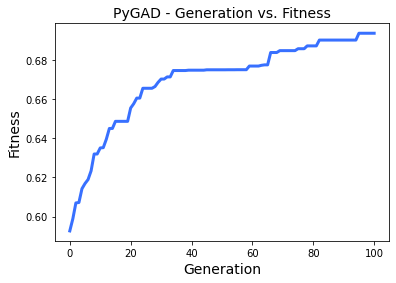

Parameters of the best solution : [11 53 38  7 55 36 55 47 44  7  3 44  5  3 44 56  7  7 44 44 38 38 15 45
 37 45 31 45 36 21  5 15 21 12 28 46 44 58 44  6 51 37  5 55 59  0 51 58
 56 40 61  0 48 36 38  2 37 21 57 23 45 28 23 17 12  7 32 51 29 23 23  7
 24  4 45 17 15 63 45 14 37 20 59 63 10 26 23 15 58 40 21 51  5  7 31  5
 14 42 41 54 61 33 40 61 58 61  3 56 17 24  0 42 21  4 28 62 17  7 29  5
  4 58 31 25 23  3  5 36 61  1 31  7 11 60 34 45 56 62 21  1 40 29  0 31
 28 27 23 23 13  1 31 51 27 29  4 13 32 56  7 46 58 54 17  9 61 54 16 61
  5 44 20 13 57 27 51 25  1 31 41 51 24 31 36 29 21 21 28  1 28 24 12 56
 11 42 11 23 60  1  5 24 16 16 28 45 49 34 30 61  3 59 45 45 56 38 46  3
 53  4 62 62 38 61 29 32  0 21 42 36 37 58 34 38  7 56 51 61  6  5 53 21
 49 21 28 63 41 25  1  1 43 61 30 47 60 12 55  5 28 16  9 32  4 20 58 26
 63 46 58 32 34  9 33 10  7 31 23 31 27 15 12 45 23 22  8 58 23  5  1 38
 26  0 44 29 40 36  8 16 24 28 31 46 29 38  4 12 60 51 32  3 37 23 37 51
 52 44 28 13 40 1

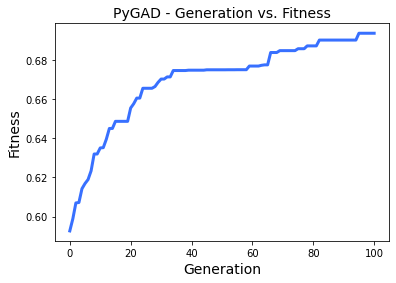

CPU times: user 2.49 s, sys: 93.1 ms, total: 2.59 s
Wall time: 2.55 s


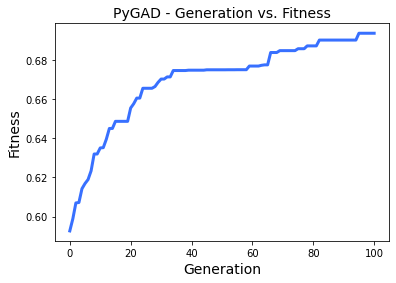

In [12]:
%%time

# Running the GA to optimize the parameters of the function.
ga_instance.run()

# After the generations complete, some plots are showed that summarize the how the outputs/fitenss values evolve over generations.
ga_instance.plot_result()

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
seq_aa = ''.join([codon_to_int[x] for x in solution])
print("NT Sequence of the best solution : {seq_aa}".format(seq_aa=seq_aa))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

# # prediction = numpy.sum(numpy.array(function_inputs)*solution) Replace
# print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

# Saving the GA instance.
 # The filename to which the instance is saved. The name is without extension.
ga_instance.save(filename=output)

# Loading the saved GA instance.
loaded_ga_instance = pygad.load(filename=output)
loaded_ga_instance.plot_result()